#### Purpose: New York Visualization Project
#### Autho: Kubam Ivo
#### Date: 1/19/2021

### Importing and preparing dataset

In [864]:
import pandas as pd
df_y = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_yellow.csv")
df_g = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_green.csv")
df_loc = pd.read_csv("C:\\Users\\ivomb\\Downloads\\taxi+_zone_lookup.csv")

In [865]:
# Filtering needed columns 
df_y = df_y[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'pulocationid', \
         'dolocationid', 'tip_amount', 'total_amount', 'trip_month' ]]

df_g = df_g[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'pulocationid', \
         'dolocationid', 'tip_amount', 'total_amount', 'trip_month' ]]

In [866]:
import warnings
warnings.filterwarnings('ignore')

In [867]:
# Ensuring pickup and dropoff fields are datetime

df_y['tpep_pickup_datetime'] = pd.to_datetime(df_y['tpep_pickup_datetime'])
df_y['tpep_dropoff_datetime'] = pd.to_datetime(df_y['tpep_dropoff_datetime'])
df_g['lpep_pickup_datetime'] = pd.to_datetime(df_g['lpep_pickup_datetime'])
df_g['lpep_dropoff_datetime'] = pd.to_datetime(df_g['lpep_dropoff_datetime'])

In [868]:
# Extracting new columns
df_y['day'] = df_y['tpep_pickup_datetime'].apply(lambda time: time.dayofweek)
df_y['day_name'] = df_y['tpep_pickup_datetime'].dt.day_name()
df_y['month_name'] = df_y['tpep_pickup_datetime'].dt.month_name()
df_y['year'] = pd.DatetimeIndex(df_y.loc[:,'tpep_pickup_datetime']).year
df_y['hour'] = pd.DatetimeIndex(df_y.loc[:,'tpep_pickup_datetime']).hour
df_y['trip_duration'] = (df_y['tpep_dropoff_datetime'] -\
                         df_y['tpep_pickup_datetime']).astype('timedelta64[m]')
df_y['uc_mile'] = df_y['trip_distance']/df['total_amount']
df_y['taxi_type'] = 'yellow'

df_g['day'] = df_g['lpep_dropoff_datetime'].apply(lambda time: time.dayofweek)
df_g['day_name'] = df_g['lpep_dropoff_datetime'].dt.day_name()
df_g['month_name'] = df_g['lpep_dropoff_datetime'].dt.month_name()
df_g['year'] = pd.DatetimeIndex(df_g.loc[:,'lpep_pickup_datetime']).year
df_g['hour'] = pd.DatetimeIndex(df_g.loc[:,'lpep_pickup_datetime']).hour
df_g['trip_duration'] = (df_g['lpep_dropoff_datetime'] - \
                         df_g['lpep_pickup_datetime']).astype('timedelta64[m]')
df_g['uc_mile'] = df_g['trip_distance']/df['total_amount']
df_g['taxi_type'] = 'green'

In [869]:
# Renaming the schema of green taxi to match that of yellow
df_g.rename(columns={'lpep_dropoff_datetime':'tpep_dropoff_datetime', 'lpep_pickup_datetime': 'tpep_pickup_datetime'},inplace=True)


In [870]:
# concat both datasets
df_concat = pd.concat([df_y,df_g])
df_concat.head()
df_concat.shape[0]

3258745

In [871]:
# Deleting rows with pickup time less than dropoff time
index_name = df_concat[df_concat['trip_duration']<0].index
df_concat.drop(index_name,inplace=True)

In [843]:
df_concat['p_time'] = df_concat['tpep_pickup_datetime'].dt.time 
df_concat['p_time'] = df_concat['tpep_dropoff_datetime'].dt.time 

In [841]:
df_concat.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
trip_distance                   float64
pulocationid                    float64
dolocationid                    float64
tip_amount                      float64
total_amount                    float64
trip_month                        int64
day                               int64
day_name                         object
month_name                       object
year                              int64
hour                              int64
trip_duration                   float64
uc_mile                         float64
taxi_type                        object
p_time                           object
d_time                           object
dtype: object

In [840]:
df_concat.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,pulocationid,dolocationid,tip_amount,total_amount,trip_month,day,day_name,month_name,year,hour,trip_duration,uc_mile,taxi_type,p_time,d_time
0,2009-01-08 20:08:00,2009-01-08 20:09:00,0.57,239.0,239.0,0.0,3.8,1,3,Thursday,January,2009,20,1.0,0.150000,yellow,20:08:00,20:09:00
1,2009-01-30 08:05:00,2009-01-30 08:11:00,1.25,263.0,141.0,0.0,5.3,1,4,Friday,January,2009,8,6.0,0.235849,yellow,08:05:00,08:11:00
2,2009-01-16 17:55:16,2009-01-16 18:03:20,0.90,143.0,142.0,0.0,7.1,1,4,Friday,January,2009,17,8.0,0.126761,yellow,17:55:16,18:03:20
3,2009-01-10 23:50:00,2009-01-11 00:00:00,2.51,230.0,137.0,0.0,9.0,1,5,Saturday,January,2009,23,10.0,0.278889,yellow,23:50:00,00:00:00
4,2009-01-29 18:35:37,2009-01-29 18:49:19,1.90,114.0,186.0,0.0,9.9,1,3,Thursday,January,2009,18,13.0,0.191919,yellow,18:35:37,18:49:19


In [863]:
df_y.shape[0]

3105257

In [859]:
def time_slot(df):
    '''Function to add time slot for each record'''
    n = df.shape[0]
    df = df.reset_index()
    df['time_slot']= ''
    for i in range(n):
        print(i)
        if df['hour'][i]>= 0 and df['hour'][i]<2:
            df['time_slot'][i]= '00:00-01:59'
        elif df['hour'][i]>= 2 and df['hour'][i]<4:
            df['time_slot'][i]= '02:00-03:59'
        elif df['hour'][i]>= 4 and df['hour'][i]<6:
            df['time_slot'][i]= '04:00-05:59'
        elif df['hour'][i]>= 6 and df['hour'][i]<8:
            df['time_slot'][i]= '06:00-07:59'
        elif df['hour'][i]>= 8 and df['hour'][i]<10:
            df['time_slot'][i]= '08:00-09:59'
        elif df['hour'][i]>= 10 and df['hour'][i]<12:
            df['time_slot'][i]= '10:00-11:59'
        elif df['hour'][i]>= 12 and df['hour'][i]< 14:
            df['time_slot'][i]= '12:00-13:59'
        elif df['hour'][i]>= 14 and df['hour'][i]<16:
            df['time_slot'][i]= '14:00-15:59'
        elif df['hour'][i]>= 16 and df['hour'][i]<18:
            df['time_slot'][i]= '16:00-17:59'
        elif df['hour'][i]>= 18 and df['hour'][i]<20: 
            df['time_slot'][i]= '18:00-19:59'
        elif df['hour'][i]>= 20 and df['hour'][i]<22:
            df['time_slot'][i]= '20:00-21:59'
        elif df['hour'][i]>= 2 :
            df['time_slot'][i]= '22:00-23:59'
        
    return df

In [804]:
def time_slot(df):
    '''Function to add time slot for each record'''
    n = df.shape[0]
    df = df.reset_index()
    df['time_slot']= ''
    for i in range(n):
        if df['p_time'][i]>= pd.to_datetime(pd.to_datetime('00:00').strftime("%H:%M:%S")) \
        and df['d_time'][i] <= pd.to_datetime(pd.to_datetime('01:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '00:00-01:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('02:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('03:59').strftime("%H:%M:%S")): 
            df['time_slot'][i]= '02:00-03:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('04:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('05:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '04:00-05:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('06:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('07:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '06:00-07:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('08:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('09:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '08:00-09:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('10:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('11:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '10:00-11:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('12:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('13:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '12:00-13:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('14:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('15:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '14:00-15:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('16:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('17:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '16:00-17:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('18:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('19:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '18:00-19:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('20:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('21:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '20:00-21:59'
        elif pd.to_datetime(pd.to_datetime(df['tpep_pickup_datetime'][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('22:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df['tpep_dropoff_datetime'][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('23:59').strftime("%H:%M:%S")):
            df['time_slot'][i]= '22:00-23:59'
        
    return df

In [872]:
x1 = df_concat.groupby(
     ['hour','day']
 ).agg(
     sum_col3 = ('trip_duration','median'),
 ).reset_index()
x1 = x1.pivot('day', 'hour', "sum_col3")

y1 = df_concat.groupby(
     ['trip_month','taxi_type']
 ).agg(
     sum_col3 = ('trip_duration','median'),
 ).reset_index()


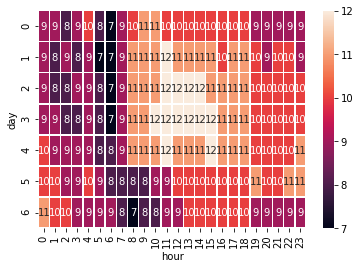

In [873]:
b = sns.heatmap(x1, annot=True,linewidths=.5)

In [ ]:
a = sns.catplot(x='trip_month', y="sum_col3" ,hue="taxi_type", kind="bar",data=y1)
a.set(xlabel='Month', ylabel='amount')



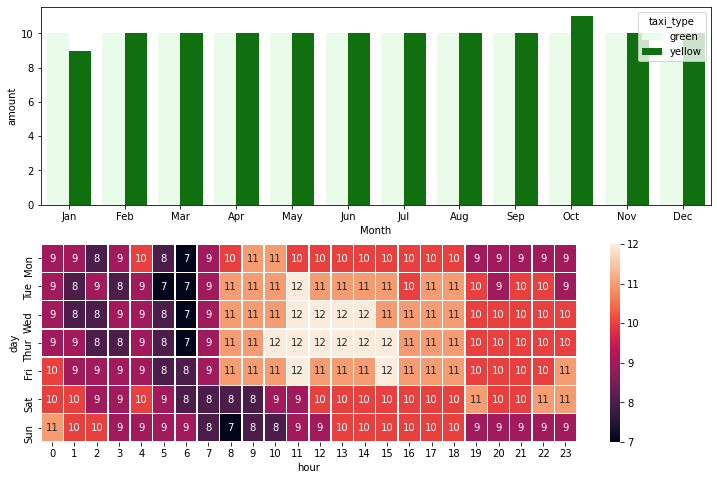

In [884]:
x_axis_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # labels for x-axis
y_axis_labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun'] # labels for y-axis

f, axes = plt.subplots(2, 1, figsize=(12,8))
a = sns.barplot(x='trip_month', y="sum_col3",color="green", data=y1, hue='taxi_type', ax=axes[0])
a.set(xlabel='Month', ylabel='amount',xticklabels=x_axis_labels)
b = sns.heatmap(x1, annot=True,linewidths=.5, ax=axes[1] , yticklabels=y_axis_labels)

#for index, row in y1.iterrows():
#    a.text(row.name,row.sum_col3, round(row.sum_col3,0), color='black', ha="center")


#### Auxillary Functions to create Visuals

In [464]:
def taxi_viz(start, end,stat,field,taxi='All'):
    '''Function to create plot based on defined route'''
    from sort_dataframeby_monthorweek import Sort_Dataframeby_Month
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
  
    dict = {}
    for i in range(df_loc.shape[0]):
        dict[df_loc['Zone'][i]] = df_loc['LocationID'][i]

    loc_list = [(k, v) for k, v in dict.items()] 
    loc_list = loc_list[:-1]
    
    dict1 = {}
    for i in np.unique(np.array(df_concat['dolocationid'][df_concat['pulocationid']==start])):
        dict1[df_loc['Zone'][i-1]] = df_loc['LocationID'][i-1]

    loc_list1= [(k, v) for k, v in dict1.items()] 
    loc_list1 = loc_list1[:-1]
    
    stat_list = [('mean','mean'),('median','median')]
    field_list = [('Duration trip','trip_duration'),('Trip Amount','total_amount'),('Tip Amount','tip_amount'),\
                  ('Trip distance','trip_distance')]
    
    fig, ax = plt.subplots(figsize=(12,5))
         
    if not (start ==0  and end == 0 ) and taxi=='All':
        
        df_g = pd.DataFrame(df_concat.loc[(df_concat.pulocationid==int(start)) & (df_concat.dolocationid==int(end))] )
        if df_g.shape[0] == 0:
            print('No record to display for this route')
        else:
            df_g = df.groupby(['month_name']).agg({field:stat})
            df_g['trip_month']= df_g.index
            df_g = Sort_Dataframeby_Month(df=df_g,monthcolumnname='trip_month')
            rect = ax.bar(df_g['trip_month'], df_g[field])
            
            if field == 'trip_duration':    
                ax.set_ylabel('Trip_duration (mins)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
            elif field == 'total_amount':
                ax.set_ylabel('Total amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
            elif field == 'tip_amount':
                ax.set_ylabel('Trip amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
            elif field == 'trip_distance':
                ax.set_ylabel('Trip distance (Miles)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())

            def autolabel(rects):
                """Attach a text label above each bar in *rects*, displaying its height."""
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate('{:10.1f}'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
            autolabel(rect)
            
            

            fig.tight_layout()

            plt.show()
        
    elif not (start ==0  and end == 0 ) and taxi=='green':
        
        df_g = pd.DataFrame(df_concat.loc[(df_concat.pulocationid==int(start)) & (df_concat.dolocationid==int(end)) \
                           & (df_concat.taxi_type=='green')])
        if df_g.shape[0] == 0:
            print('No record to display for this route')
        else:
            df_g = df.groupby(['month_name']).agg({field:stat})
            df_g['trip_month']= df_g.index
            df_g = Sort_Dataframeby_Month(df=df_g,monthcolumnname='trip_month')
            rect = ax.bar(df_g['trip_month'], df_g[field])
            
            if field == 'trip_duration':    
                ax.set_ylabel('Trip_duration (mins)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'total_amount':
                ax.set_ylabel('Total amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'tip_amount':
                ax.set_ylabel('Trip amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'trip_distance':
                ax.set_ylabel('Trip distance (Miles)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())

            def autolabel(rects):
                """Attach a text label above each bar in *rects*, displaying its height."""
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate('{:10.1f}'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
            autolabel(rect)

            fig.tight_layout()

            plt.show()
                                         
    elif not (start ==0  and end == 0 ) and taxi=='yellow':
        
        df_g = pd.DataFrame(df_concat.loc[(df_concat.pulocationid==int(start)) & (df_concat.dolocationid==int(end)) \
                           & (df_concat.taxi_type=='yellow')])
        if df_g.shape[0] == 0:
            print('No record to display for this route')
        else:
            df_g = df.groupby(['month_name']).agg({field:stat})
            df_g['trip_month']= df_g.index
            df_g = Sort_Dataframeby_Month(df=df_g,monthcolumnname='trip_month')
            rect = ax.bar(df_g['trip_month'], df_g[field])
            
            if field == 'trip_duration':    
                ax.set_ylabel('Trip_duration (mins)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'total_amount':
                ax.set_ylabel('Total amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'tip_amount':
                ax.set_ylabel('Trip amount (dollars)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
                
            elif field == 'trip_distance':
                ax.set_ylabel('Trip distance (Miles)')
                ax.set_xlabel('Month')
                ax.set_title('Monthly '+stat+ ' '+ taxi + ' taxi ' + ' trip duration from ' + df_loc['Zone'][df_loc['LocationID']==start].any() + \
                             ' to ' + df_loc['Zone'][df_loc['LocationID']==end].any())
           

            def autolabel(rects):
                """Attach a text label above each bar in *rects*, displaying its height."""
                for rect in rects:
                    height = rect.get_height()
                    ax.annotate('{:10.1f}'.format(height),
                                xy=(rect.get_x() + rect.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
            autolabel(rect)

            fig.tight_layout()

            plt.show()
                   
        

In [465]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

a = widgets.Dropdown(description='Start',options=loc_list,value=263)
b = widgets.Dropdown(description='End',options=loc_list1)
c = widgets.RadioButtons(description='Stat',options=stat_list, value='mean')
d = widgets.Select(description='Field',options=field_list, value='trip_duration')
e = widgets.RadioButtons(description='Taxi',options=['All','green','yellow'], value='All')
left_box = widgets.VBox([a, b])
right_box = widgets.VBox([e,c])
right_box1 = widgets.VBox([d])
ui = widgets.HBox([left_box,right_box,right_box1])
out = widgets.interactive_output(taxi_viz,{'start':a,'end':b,'taxi':e, 'stat':c, 'field':d})
display(ui, out)

Output()

In [455]:
w = interactive(month_viz,start=loc_list,end=loc_list, stat=stat_list)

ValueError: cannot find widget or abbreviation for argument: 'field'

In [241]:
df_g = df_green.groupby(['month_name']).agg({'trip_duration':'max'})
df_g['trip_month']= df_g.index
Sort_Dataframeby_Month(df=df_g,monthcolumnname='trip_month')

,trip_duration,trip_month
0,1439.0,January
1,1439.0,February
2,1516.0,March
3,49965.0,April
4,3675.0,May
5,1439.0,June
6,1439.0,July
7,1439.0,August
8,1439.0,September
9,1439.0,October


In [220]:
a = widgets.Dropdown(description='Start location',options=loc_list,value=95)
b = widgets.Dropdown(description='End location',options=loc_list,value=160)

In [221]:
interact(month_viz,start=a,end=b, stat=stat_list)

interactive(children=(Dropdown(description='Start location', index=93, options=(('Newark Airport', 1), ('Jamai…

<function __main__.month_viz(start, end, stat='mean')>

In [211]:
a.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_options_labels',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'description',
 'description_tooltip',
 'disabled',
 'index',
 'layout',
 'style']

In [372]:
dict1 = {}
for i in np.unique(np.array(df['dolocationid'][df['pulocationid']==1])):
    dict1[df_loc['Zone'][i-1]] = df_loc['LocationID'][i-1]


loc_list1= [(k, v) for k, v in dict1.items()] 
del loc_list1[-1]
loc_list1

[('Newark Airport', 1),
 ('Gramercy', 107),
 ('Hillcrest/Pomonok', 121),
 ('Midtown Center', 161),
 ('Midtown East', 162),
 ('Morningside Heights', 166),
 ('Times Sq/Theatre District', 230),
 ('West Chelsea/Hudson Yards', 246),
 ('West Village', 249),
 ('NV', 264)]

In [343]:
df_loc

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [94]:
def month_viz(start=0, end=0,type='lineplot',stat='mean'):
    '''Function to create plot based on defined route'''
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    if  (start ==0  and end == 0 ) and type=='bar':
        df_g = df_green.groupby(['trip_month']).agg({'trip_duration':stat})
        df_g['trip_month']= df_g.index
        print(df_g['trip_duration'])
        sns.barplot(data=df_g, x='trip_month', y='trip_duration', color = 'blue')
        
    elif (start ==0  and end == 0 ) and type=='line':
        df_g = df_green.groupby(['trip_month']).agg({'trip_duration':stat})
        df_g['trip_month']= df_g.index
        print(df_g['trip_duration'])
        sns.lineplot(data=df_g, x='trip_month', y='trip_duration')
    
    elif not (start ==0  and end == 0 ):
        if type == 'line':
            df_g = pd.DataFrame(df_green.loc[(df_green.pulocationid==int(start)) & (df_green.dolocationid==int(end))] )
            if df_g.shape[0] == 0:
                print('No record to display for this route')
            else:
                df_g = df_g.groupby(['trip_month']).agg({'trip_duration':stat})
                df_g['trip_month']= df_g.index
                print(df_g['trip_duration'])
                sns.lineplot(data=df_g, x='trip_month', y='trip_duration')
            
        elif type == 'bar':
            df_g = df_green.loc[(df_green.pulocationid==int(start)) & (df_green.dolocationid==int(end))] 
            if df_g.shape[0] == 0:
                print('No record to display for this route')
            else:
                df_g = df_g.groupby(['trip_month']).agg({'trip_duration':stat})
                df_g['trip_month']= df_g.index
                print(df_g['trip_duration'])
                sns.barplot(data=df_g, x='trip_month', y='trip_duration',color = 'c')
        

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
stat = 'median'
df_g = df_green.groupby(['month_name']).agg({'trip_duration':stat})
df_g['trip_month']= df_g.index
df_g = Sort_Dataframeby_Month(df=df_g,monthcolumnname='trip_month')
rect = ax.bar(df_g['trip_month'], df_g['trip_duration'])

ax.set_ylabel('Trip_duration(mins)')
ax.set_xlabel('Month')
ax.set_title('Monthly '+stat+ ' trip duration')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:10.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rect)

fig.tight_layout()

plt.show()